# Kickstarter Projects Analysis
- - - 
### Author: [Ronald Gachoka](https://github.com/rongachoka)

## 1. Business Understanding

This project aims to analyze the relationship between backer engagement and project success. <br>
Investigate factors such as the number of backers, average pledge amounts and determine if there is any correlation between high backer engagement and project success.


## 2. Data Understanding

This phase is broken down into the following steps:
> - Data collection
> - Describing the data
> - Data exploration
> - Verify data quality

The data was collected from the Kickstarter Projects at https://www.mavenanalytics.io/data-playground 

#### Load Libraries

In [15]:
## Data

import numpy as np
import pandas as pd

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

## Statistics
import scipy.stats as stats

## styling
plt.style.use("seaborn-deep")

/var/folders/rs/11qpr4qj5r5_0n7b0yg8xgp40000gn/T/ipykernel_5420/477386479.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-deep")


#### Data Collection

In [2]:
## Kickstarter_projects is loaded and stored in kickstarter_df

kickstarter_df = pd.read_csv("kickstarter_projects.csv")
kickstarter_details = pd.read_csv("kickstarter_projects_data_dictionary.csv")

## Shape of the dataframe

print("Shape of the dataframe: ", kickstarter_df.shape)
print("Shape of the dataframe: ", kickstarter_details.shape)
kickstarter_df.head()


Shape of the dataframe:  (374853, 11)
Shape of the dataframe:  (11, 2)


,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed


In [3]:
kickstarter_details

,Field,Description
0,ID,Internal kickstarter id
1,Name,Name of the project
2,Category,Project category
3,Subcategory,Project subcategory
4,Country,Country the project is from
5,Launched,Date the project was launched
6,Deadline,Deadline date for crowdfunding
7,Goal,Amount of money the creator needs to complete ...
8,Pledged,Amount of money pledged by the crowd (USD)
9,Backers,Number of backers


The kickstarter_df has 374,853 rows and 11 columns <br>
The kickstarter_details has 11 rows and 2 columns

The kickstarter_details will be used along the kickstart_df to provide additional details to what each of the column means.

**Categorical columns (8)** <br>

- ID - Internal kickstarter id <br>
- Name - Name of the project <br>
- Category - Kickstarter project category <br>
- Subcategory - Kickstarter project subcategory <br>
- Country - Country the project is from <br>
- Launched - Date the project was launched <br>
- Deadline - Deadline date for crowdfunding <br>
- State - Current condition the project is in (as of 2018-01-02)

**Numerical columns (3)** <br>

- Goal - Amount of money the creator needs to complete the project (USD) <br>
- Pledged - Amount of money pledged by the crowd (USD) <br>
- Backers - Number of backers <br>

In [4]:
## Data Description

kickstarter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ID           374853 non-null  int64 
 1   Name         374853 non-null  object
 2   Category     374853 non-null  object
 3   Subcategory  374853 non-null  object
 4   Country      374853 non-null  object
 5   Launched     374853 non-null  object
 6   Deadline     374853 non-null  object
 7   Goal         374853 non-null  int64 
 8   Pledged      374853 non-null  int64 
 9   Backers      374853 non-null  int64 
 10  State        374853 non-null  object
dtypes: int64(4), object(7)
memory usage: 31.5+ MB


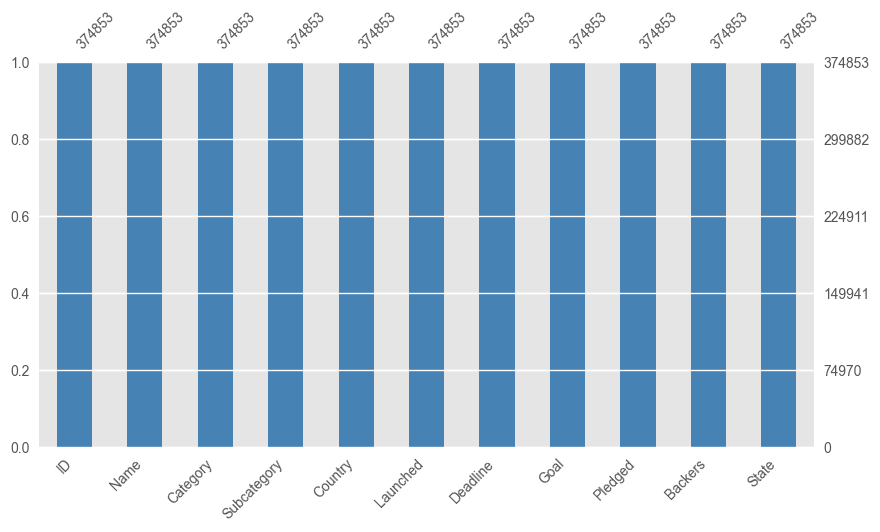

In [21]:
## Visualizing the missing values

msno.bar(kickstarter_df,color="steelblue", figsize = (10, 5), fontsize = 10);